## 1. Pré-processamento

* Dataset usado: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
* 0 é fake e 1 é real

In [1]:
import pandas as pd
import sklearn as sk

# Exibe a versão do pandas e sklearn
pd.__version__, sk.__version__

('1.5.3', '1.2.1')

### Lê a base de dados e a exibe

In [2]:
# Lê o arquivo CSV em um DataFrame do pandas
df = pd.read_csv('WELFake_Dataset.csv')

# Exibe as primeiras linhas do DataFrame
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Remove a primeira coluna do dataframe

In [3]:
# A função "drop" remove uma coluna (ou linha) de um DataFrame
# "df.columns[0]" seleciona a primeira coluna do DataFrame
# "axis=1" especifica que queremos remover uma coluna, não uma linha (o valor 1 significa coluna, enquanto o valor 0 significa linha)

df = df.drop(df.columns[0], axis=1)
# A remoção não afeta o DataFrame original, então atribuímos o resultado de volta a "df"

In [4]:
# Exibe as primeiras linhas do DataFrame
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Remove linhas nulas

In [5]:
# total de linhas do dataframe
df.shape[0]

72134

In [6]:
# O método "isnull()" verifica quais valores do DataFrame são nulos e 
# retorna um DataFrame de valores booleanos com a mesma forma

# O método "sum()" soma os valores booleanos em cada coluna, contando quantos valores nulos 
# existem em cada coluna

df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [7]:
# Remove linhas nulas
df = df.dropna()

#exibe de novo pra gente conferir o que mudou
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [8]:
# total de linhas do dataframe
df.shape[0]

71537

### Checa e remove linhas repetidas

In [9]:
# Encontra as linhas duplicadas usando o método "duplicated"
df.duplicated().sum()

8416

In [10]:
# Remove as linhas duplicadas usando o método "drop_duplicates"
df = df.drop_duplicates()

#mostra o total de linhas na base de dados agora
df.shape[0]

63121

### Existe equilíbrio no dataset?

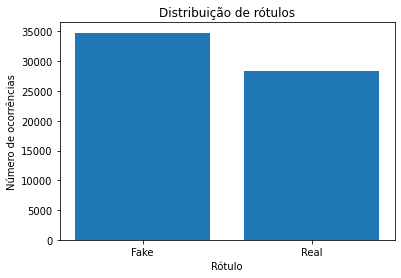

In [11]:
import matplotlib.pyplot as plt

# Conta o número de ocorrências de cada rótulo
label_count = df.label.value_counts()

# Cria um gráfico de barras usando a Matplotlib
plt.bar(label_count.index, label_count)

# Define o título do gráfico
plt.title('Distribuição de rótulos')

# Define o nome do eixo x do gráfico
plt.xlabel('Rótulo')

# Define o nome do eixo y do gráfico
plt.ylabel('Número de ocorrências')

# Mostrar os rótulos corretamente no eixo x
plt.xticks([0, 1], ['Fake', 'Real'])

# Exibe o gráfico
plt.show()

In [12]:
print("Total de rótulos Fake:", 100 * label_count[0] / (label_count[0] + label_count[1]))
print("Total de rótulos Real:", 100 * label_count[1] / (label_count[0] + label_count[1]))

# há um desbalanceamento aqui, que pode ser tratado com sobreamostragem, subamostragem dentre outras 
# técnicas

Total de rótulos Fake: 55.11794806799639
Total de rótulos Real: 44.88205193200361


## 2. Bag-of-Words

In [13]:
from sklearn.model_selection import train_test_split

#juntamos título e texto na mesma coluna
# axis = 1 é concatenação horizontal
#lambda: para cada linha, aplicamos a união de title e text, incluindo um espaço entre os dois
df['news'] = pd.concat([df['title'], df['text']], axis=1).apply(lambda x: ' '.join(x), axis=1)

df.head()

,title,text,label,news
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...


### Alguns tratamentos como remoção de stopwords, lemmatização...

In [14]:
import nltk
from nltk.corpus import stopwords

# Remove as palavras de parada (stop words) de cada notícia
stop_words = set(stopwords.words('english'))
df['news_no_stopwords'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df['news_no_stopwords']

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story Christi...
4        SATAN 2: Russia unvelis image terrifying new ‘...
5        About Time! Christian Group Sues Amazon SPLC D...
                               ...                        
72127    WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...
72129    Russians steal research Trump hack U.S. Democr...
72130    WATCH: Giuliani Demands That Democrats Apologi...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
Name: news_no_stopwords, Length: 63121, dtype: object

In [15]:
#total de palavras ANTES das stopwords
df['news'].str.split().apply(len)

0         889
2          52
3        1337
4         345
5         257
         ... 
72127     220
72129     746
72130     614
72131     487
72132     569
Name: news, Length: 63121, dtype: int64

In [16]:
#total de palavras DEPOIS das stopwords
df['news_no_stopwords'].str.split().apply(len)

0        541
2         40
3        810
4        233
5        162
        ... 
72127    145
72129    493
72130    353
72131    298
72132    366
Name: news_no_stopwords, Length: 63121, dtype: int64

In [17]:
from nltk.stem import WordNetLemmatizer

# Reduz as palavras em cada notícia para sua forma canônica (lemmatization)
lemmatizer = WordNetLemmatizer()
df['news_lemmatized'] = df['news_no_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [18]:
# Separa o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['news_lemmatized'], df['label'], test_size=0.2)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer #vetoriza usando BoW

# Vetoriza os dados de texto usando Bag-of-Words
bow_vectorizer = CountVectorizer()
train_features = bow_vectorizer.fit_transform(X_train)
test_features = bow_vectorizer.transform(X_test)

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Cria um modelo de classificação Naive Bayes Multinomial e o treina nos dados de treinamento
clf = MultinomialNB()
clf.fit(train_features, y_train)

# Avalia a acurácia do modelo nos dados de treino
accuracy = clf.score(train_features, y_train)
print("Acurácia:", accuracy)

Acurácia: 0.9197956273764258


In [21]:
# Avalia a acurácia do modelo nos dados de teste
accuracy = clf.score(test_features, y_test)
print("Acurácia:", accuracy)

Acurácia: 0.8992475247524753


In [22]:
from sklearn.metrics import classification_report

# Faz a predição no conjunto de teste
y_pred = clf.predict(test_features)

# calcula as métricas de classificação
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])

# imprime o relatório
print(report)

              precision    recall  f1-score   support

        Fake       0.90      0.92      0.91      6993
        Real       0.90      0.88      0.89      5632

    accuracy                           0.90     12625
   macro avg       0.90      0.90      0.90     12625
weighted avg       0.90      0.90      0.90     12625



### Precision:
a proporção de verdadeiros positivos (TP) entre o total de resultados classificados como positivos (TP + FP). No caso de notícias falsas, a precision é de 0.90, ou seja, 90% das notícias classificadas como falsas pelo modelo realmente são falsas. Para notícias verdadeiras, a precision é de 0.89, ou seja, 89% das notícias classificadas como verdadeiras pelo modelo realmente são verdadeiras.

* TP = Notícias verdadeiras classificadas como verdadeiras
* FP = Fake news classificadas incorretamente como verdadeiras

### Recall: 
a proporção de verdadeiros positivos (TP) entre o total de exemplos positivos (TP + FN). No caso de notícias falsas, o recall é de 0.92, ou seja, o modelo consegue detectar 92% das notícias falsas presentes no conjunto de dados. Para notícias verdadeiras, o recall é de 0.87, ou seja, o modelo consegue detectar apenas 87% das notícias verdadeiras presentes no conjunto de dados.

* FN = Notícias verdadeiras classificadas incorretamente como fake

# Cross Validation

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Recria o classificador
clf = MultinomialNB()

# Define as métricas que deseja calcular
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_0': make_scorer(precision_score, average='binary', pos_label=0),
    'recall_0': make_scorer(recall_score, average='binary', pos_label=0),
    'f1_score_0': make_scorer(f1_score, average='binary', pos_label=0),
    'precision_1': make_scorer(precision_score, average='binary', pos_label=1),
    'recall_1': make_scorer(recall_score, average='binary', pos_label=1),
    'f1_score_1': make_scorer(f1_score, average='binary', pos_label=1)
}

# Aplica a validação cruzada e calcula as métricas para cada fold
scores = cross_validate(clf, train_features, y_train, cv=5, scoring=scoring)

# Imprime as métricas médias e desvio padrão para cada fold
print("Métricas para a classe 0:")
print("Acurácia média:", scores['test_accuracy'].mean())
print("Precisão média:", scores['test_precision_0'].mean())
print("Recall médio:", scores['test_recall_0'].mean())
print("F1-score médio:", scores['test_f1_score_0'].mean())

print("\nMétricas para a classe 1:")
print("Acurácia média:", scores['test_accuracy'].mean())
print("Precisão média:", scores['test_precision_1'].mean())
print("Recall médio:", scores['test_recall_1'].mean())
print("F1-score médio:", scores['test_f1_score_1'].mean())

Métricas para a classe 0:
Acurácia média: 0.8972195659015352
Precisão média: 0.9005110699353921
Recall médio: 0.9143101859580873
F1-score médio: 0.9073552225477318

Métricas para a classe 1:
Acurácia média: 0.8972195659015352
Precisão média: 0.8930650443939931
Recall médio: 0.8762885535345653
F1-score médio: 0.8845926076113105


Bag-Of-Words foi melhor do que o TF-IDF nesse caso. Isso pode ser um indicativo de que a ocorrência de palavras talvez seja uma feature mais impactante do que palavras mais específicas em conjuntos distintos. 

No entanto, o algoritmo também tem um papel para o resultado final e isso pode ter impactado. As vezes um algoritmo diferente poderia fazer o TF-IDF se sair melhor.

# Referências

* ChatGPT
* https://www.udemy.com/course/natural-language-processing-in-python/
* https://www.youtube.com/watch?v=5MaWmXwxFNQ
* https://www.youtube.com/watch?v=ATK6fm3cYfI&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=18
* https://en.wikipedia.org/wiki/Precision_and_recall
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html